<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 2</h3>
    <h5>Ejercicio 2</h5>
        <p>Grupo: 4<p>
</div>

 <h1>Esta actividad asincrónica se segmentará en dos partes. La primera implicará la interpretación de gráficos de autocorrelación, mientras que en la segunda abordaremos un ejemplo seleccionado por usted, en el cual trabajarán con algunos enunciados.</h1>

In [25]:
# IMPORTAR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
import json
import requests

import warnings
warnings.filterwarnings('ignore')

 <h2> PRIMERA PARTE</h2>

<li type="square">Primera parte - ej - 1) Ejecutar los dos códigos a continuación y luego determinar en cada caso, en base a la grafica de autocorrelación, si las series son o no estacionarias.</li>

 <h3> CODIGO 1 </h3>

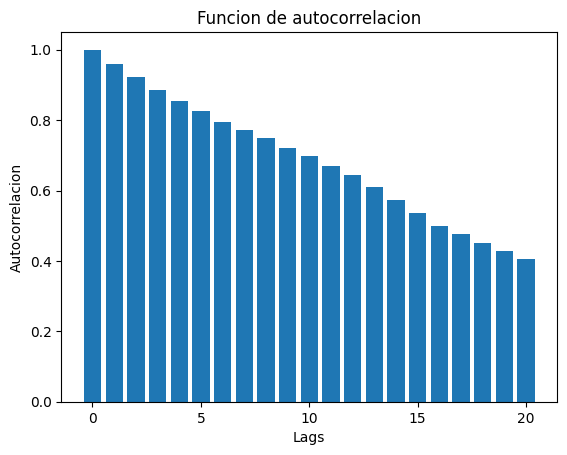

In [2]:
# CORRER EL CODIGO

# Simulacion de serie 1
np.random.seed(0)
tiempo = np.arange(0, 100)
estacionalidad = 10 * np.sin(2 * np.pi * tiempo / 12)
data_codigo_1 = 2 * tiempo + estacionalidad + np.random.randn(100) * 5

# Calculo de la función de autocorrelación
lags_maximos = 20
autocorr = acf(data_codigo_1, nlags=lags_maximos)

# Graficar de la función de autocorrelación
plt.bar(range(lags_maximos+1), autocorr)
plt.xlabel('Lags')
plt.ylabel('Autocorrelacion')
plt.title('Funcion de autocorrelacion')
plt.show()

In [ ]:
''' Escribir aqui la respuesta (¿ es o no es estacionaria? - JUSTIFICAR)

De acuerdo al Correlograma, se puede apreciar que la variable "data_codigo_1" es una serie no estacionaria ya que 
está compuesta por una tendencia vinculada a la variable tiempo y además posee un componente estacional. 
Asimismo, se puede afirmar que no presenta una disminución exponencial de los valores de autocorrelación.

'''

 <h3> CODIGO 2 </h3>

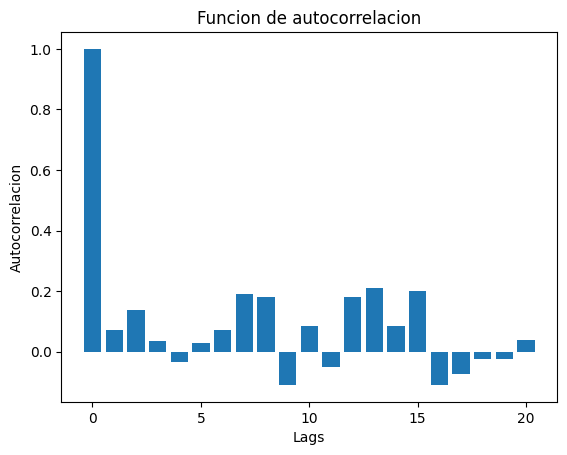

In [3]:
# CORRER EL CODIGO

# Simulacion de serie 2
np.random.seed(0)
data = np.random.randn(100)

# Calculo de la función de autocorrelación
autocorr = acf(data, nlags=lags_maximos)

# Graficar de la función de autocorrelación
plt.bar(range(lags_maximos+1), autocorr)
plt.xlabel('Lags')
plt.ylabel('Autocorrelacion')
plt.title('Funcion de autocorrelacion')
plt.show()

In [ ]:
''' Escribir aqui la respuesta (¿ es o no es estacionaria? - JUSTIFICAR)

Según el Correlograma, da la impresión de que variable "data" es una serie estacionaria debido a que no se observa 
una tendencia a lo largo del tiempo y los valores se encuentran alrededor de 0 sin mostrar una clara tendencia creciente o decreciente.
Tampoco da indicios de presentar un componente estacional ya que la serie parece oscilar aleatoriamente sin un patrón claro.
Entonces, se observa un decrecimiento exponencial de los valores calculados de la autocorrelación.

'''

 <h2> SEGUNDA PARTE</h2>

 Buscar un data set público de interés, descargarlo, importarlo y seguir las consignas.

<li type="square">1) Leer la base y configurar la/s variables de interes como serie/s de tiempo.</li>

In [29]:
# escriba aqui su codigo

# Se usará la variable NADDU que mide la variación del númerzo de direcciones únicos que utilizan Bitcoin.

# URL del archivo JSON en línea
url = "https://api.blockchain.info/charts/n-unique-addresses?timespan=5years&format=json"

# Descarga el contenido del archivo JSON
response = requests.get(url)
# Verifica si la descarga fue exitosa (código de estado 200)
if response.status_code == 200:
    # Carga el contenido JSON en un DataFrame de pandas
    json_data = response.json()
    NADDU = pd.DataFrame(json_data["values"])
    
    # Convierte la columna "X" en objetos de fecha y hora según horario UTC
    NADDU["x"] = pd.to_datetime(NADDU["x"], unit="s", utc=True)
    
else:
    print("Error al descargar el archivo JSON. Código de estado:", response.status_code)

NADDU['x'] = pd.to_datetime(NADDU['x'])

NADDU.index = NADDU['x']

del NADDU['x']

NADDU=NADDU.asfreq('d')

# Calcular la variación porcentual
NADDU['varNADDU'] = NADDU['y'].pct_change() * 100

# Se elimina la primera fila por la presencia de un valor nulo.
NADDU = NADDU.iloc[1:] 

# Eliminar la columna 'y'
NADDU = NADDU.drop(['y'], axis=1)
NADDU.head()

,varNADDU
x,
2018-11-12 00:00:00+00:00,20.658781
2018-11-13 00:00:00+00:00,-3.644811
2018-11-14 00:00:00+00:00,6.757419
2018-11-15 00:00:00+00:00,-0.204012
2018-11-16 00:00:00+00:00,1.797293




<li type="square">2) Graficar la/s variable/s en el tiempo.</li>

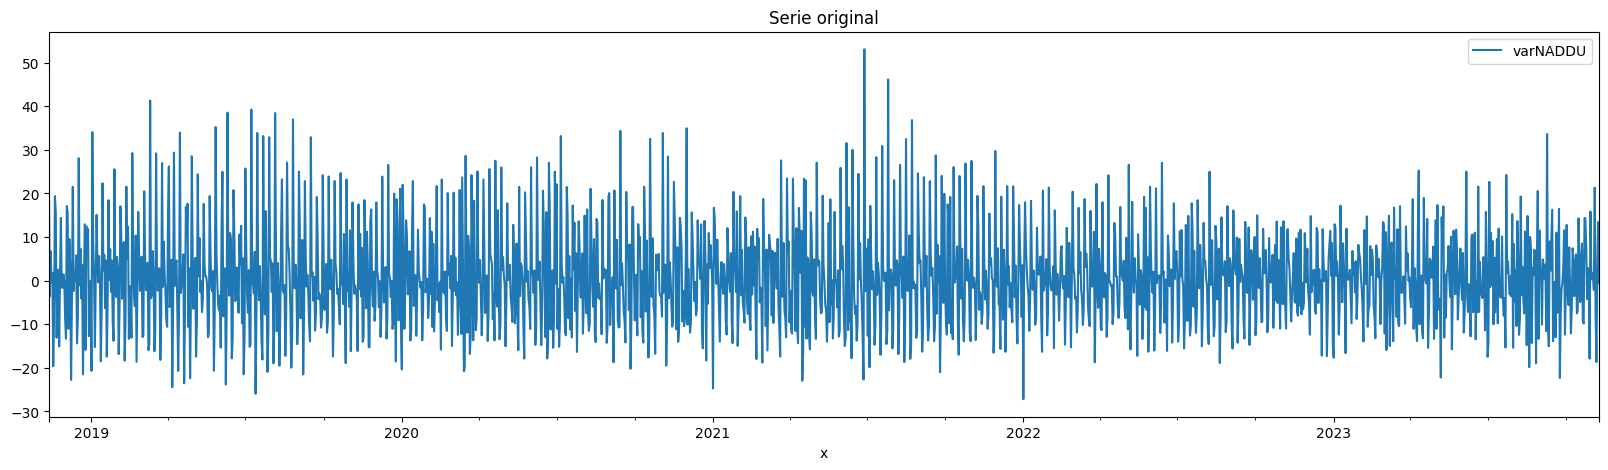

In [30]:
# escriba aqui su codigo

NADDU.plot(figsize=(20,5), title = "Serie original")
plt.show()

<li type="square">3) Graficar el Correlograma y analizar su comportamiento.</li>

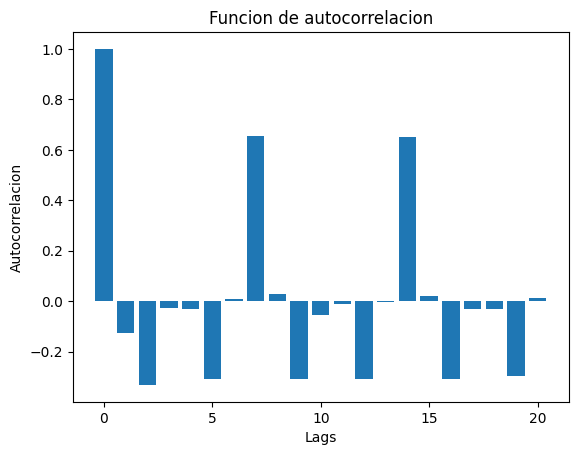

In [31]:
# escriba aqui su codigo

# Calculo de la función de autocorrelación
autocorr = acf(NADDU, nlags=lags_maximos)

# Graficar de la función de autocorrelación
plt.bar(range(lags_maximos+1), autocorr)
plt.xlabel('Lags')
plt.ylabel('Autocorrelacion')
plt.title('Funcion de autocorrelacion')
plt.show()

In [ ]:
'''
Analize brevemente aqui el comportamiento

En función al gráfico de Correlograma, se puede observar que la variable NADDU es 
una variable no estacionaria y además es posible la presencia de un componente estacional.

'''


<li type="square">4) Realizar Estadística Descriptiva de la/s variable/s.</li>

In [32]:
# escriba aqui su codigo

NADDU.describe()

,varNADDU
count,1824.000000
mean,0.664819
std,11.423031
min,-27.189315
25%,-7.350930
50%,-0.225909
75%,6.630245
max,53.088908


In [ ]:
'''
Escriba aqui los analisis

La variable NADDU, que mide la variación en el número de direcciones únicas que utilizan Bitcoin, 
muestra un incremento promedio del 0.665%, aunque la desviación estándar de alrededor de 11.423 
revela una notoria variabilidad en los datos. La mediana de -0.225909 indica que la mitad de las 
observaciones tienen una variación porcentual negativa igual o menor. La presencia de una amplia 
dispersión, evidenciada por valores que oscilan entre -27.189315 (mínimo) y 53.088908 (máximo), 
sugiere la existencia de variaciones extremas en ambas direcciones. 

'''